In [1]:
import pandas as pd
from util import eda_augment_dataset, get_dataframe_from_json
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Loading and data preprocessing

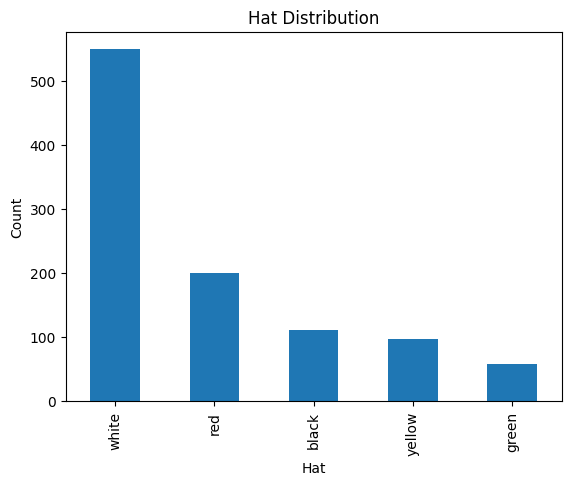

In [6]:
hld = get_dataframe_from_json('../dailydialog/hand_labeled/hand_labelled_dataset.json')

# Convert labels to integer
hat_map = {
    0: "red",
    1: "white",
    2: "black",
    3: "yellow",
    4: "green",
}
reverse_hat_map = {v: k for k, v in hat_map.items()}
hld['hat'] = hld['hat'].apply(lambda x: reverse_hat_map[x])

# Removing __eou__ delimiter
hld['utterance'] = hld['utterance'].str.replace('__eou__', '', regex=False)

# Remove useless white spaces
hld['utterance'] = hld['utterance'].str.replace(r'\s+([,.!?;:])', r'\1', regex=True)

hld['hat'].map(hat_map).value_counts().plot(kind='bar')
plt.title("Hat Distribution")
plt.xlabel("Hat")
plt.ylabel("Count")
plt.show()

In [7]:
train_df, test_df = train_test_split(hld, test_size=0.2, random_state=42, stratify=hld['hat'])

train_df.to_json('normal_train_dataset.json', orient='records', lines=False)
test_df.to_json('normal_test_dataset.json', orient='records', lines=False)

# Data Augmentation using EDA

In [22]:

green_augmented = eda_augment_dataset(train_df[train_df['hat'] == 4], num_aug=10, alpha_sr=0.05, alpha_ri=0.05, alpha_rs=0.05, p_rd=0.1)
yellow_augmented = eda_augment_dataset(train_df[train_df['hat'] == 3], num_aug=6, alpha_sr=0.05, alpha_ri=0.05, alpha_rs=0.05, p_rd=0.1)
black_augmented = eda_augment_dataset(train_df[train_df['hat'] == 2], num_aug=5, alpha_sr=0.05, alpha_ri=0.05, alpha_rs=0.05, p_rd=0.1)
red_augmented = eda_augment_dataset(train_df[train_df['hat'] == 0], num_aug=2, alpha_sr=0.05, alpha_ri=0.05, alpha_rs=0.05, p_rd=0.1)

augmented_train_df = pd.concat([train_df, green_augmented, yellow_augmented, black_augmented, red_augmented], ignore_index=True)
augmented_train_df

,turn,utterance,emotion,act,hat
0,3,"I'll take one, too.",happiness,inform,0
1,8,"You know, we are superior to other clothes com...",no_emotion,inform,3
2,5,"Her new boyfriend, right?",no_emotion,commissive,1
3,9,How about recommending him to use the storage ...,no_emotion,directive,4
4,1,"Oh, a bouquet of flowers. It's very kind of you.",surprise,commissive,1
...,...,...,...,...,...
2501,5,give thanks you,happiness,inform,0
2502,0,i prefer to eggplants,no_emotion,inform,0
2503,0,i prefer tater to eggplants,no_emotion,inform,0
2504,0,i am all bored so day,no_emotion,inform,0


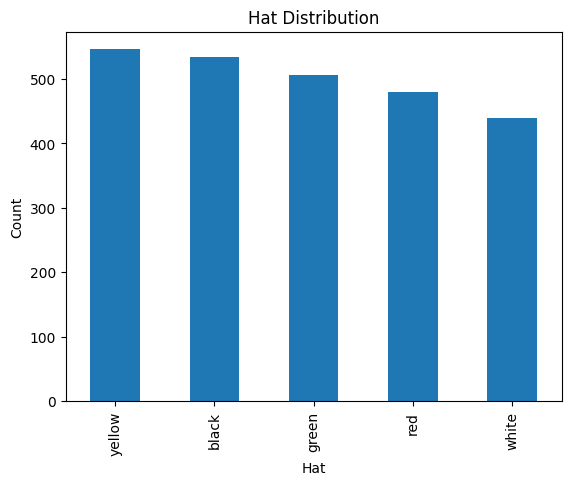

In [23]:
augmented_train_df['hat'].map(hat_map).value_counts().plot(kind='bar')
plt.title("Hat Distribution")
plt.xlabel("Hat")
plt.ylabel("Count")
plt.show()

In [30]:
augmented_train_df.to_json('eda_train_dataset.json', orient='records', lines=False)
test_df.to_json('eda_test_dataset.json', orient='records', lines=False)

# Loading and Preprocessing the Automated Labeled Dataset

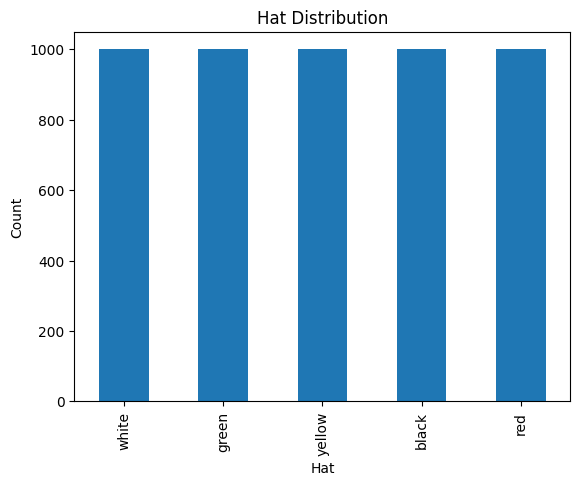

In [2]:
ald = pd.read_csv('../dailydialog/final_dataset.csv')

# Convert labels to integer
hat_map = {
    0: "red",
    1: "white",
    2: "black",
    3: "yellow",
    4: "green",
}
reverse_hat_map = {v: k for k, v in hat_map.items()}
ald['hat'] = ald['hat'].apply(lambda x: reverse_hat_map[x])

# Removing __eou__ delimiter
ald['utterance'] = ald['utterance'].str.replace('__eou__', '', regex=False)

# Remove useless white spaces
ald['utterance'] = ald['utterance'].str.replace(r'\s+([,.!?;:])', r'\1', regex=True)

ald['hat'].map(hat_map).value_counts().plot(kind='bar')
plt.title("Hat Distribution")
plt.xlabel("Hat")
plt.ylabel("Count")
plt.show()

In [3]:
ald_train_df, ald_test_df = train_test_split(ald, test_size=0.2, random_state=42, stratify=ald['hat'])

ald_train_df.to_json('ald_train_dataset.json', orient='records', lines=False)
ald_test_df.to_json('ald_test_dataset.json', orient='records', lines=False)